                                                                              Helga Sigríður Magnúsdóttir s202027 
                                                                                 Hlynur Árni Sigurjónsson s192302
                                                                             Katrín Erla Bergsveinsdóttir s202026
                                                                                Kristín Björk Lilliendahl s192296
 
 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<img src="https://susfans.eu/sites/default/files/clients/DTU.png"  align="right" width="300"/>

# Business Question - Text Analyzis

### What are Customers Liking About Pizza Restaurants in Copenhagen and is the Location of it Important? 
 
We wanted to further analyze pizza restaurant in Copenhagen and what their reviews can tell us 🇩🇰🍕

In this business question, we are consultants for a company who wants to open a pizza restaurant in Copenhagen. The company wants the restaurant to be popular and have great reviews. Thus, we took data regarding reviews and restaurants from Trip Advisor to analyze and find out what people like about pizza restaurants in Copenhagen. Moreover, check if the location of the pizza restaurants is correlated with great reviews because the company is not sure about where to locate its new restaurant. The company also wanted to know what are customers' favorite features about restaurants that offe pizza and what do they complain about.

In detail, the company asked us to look at the positive reviews to find out what words are associated with reviews that have a rating of four and five stars. Furthermore, the company also wanted to know what to be aware of. Thus, we also analyzed words associated with okay and bad reviews. 

Secondly, we analyzed if there was a connection between great/bad ratings and the location of the restaurant.

Lastly, we made a sentiment analysis on the reviews.

#### So what we want to analyze 🕵🏼‍♀️
* Look at positive reviews by analyzing the most frequent words
* Look at negative reviews by analyzing the most frequent words
* Look at the restaurant location based on a good  review rate
* Run the sentimental analysis to find out the customer's positive and negative features in their reviews

#### Data that will be used 🥒
* few pickled dataframes created in **"Milesone1.ipynb"**
* restaurants.pkl
* reviews.pkl

## Contents
* [1. Desciptive Data Analysis](#Descriptive)
    * [1.1 Restaurants](#Restaurants)
    * [1.2 Reviews](#Reviews)
    * [1.3 Explore Merged Dataframe](#Explore)
* [2. Text Preprocessing](#TextPreProcessing)
* [3. Analyzing the Reviews](#Analyzing)
    * [3.1 All Ratings](#AllRatings)
    * [3.2 Reviews: 4 and 5 Stars](#4-5Reviews)
    * [3.3 Reviews: 2 and 3 Stars](#2-3Reviews)
    * [3.4 Reviews: 1 Star](#1Review)
* [4. Location](#Location)
* [5. Sentiment Analysis](#SentimentAnalysis)
    * [5.1 Classification](#Classification)
        * [5.1.1 LSA](#LSA)
        * [5.1.2 Modelling](#Modelling)
        * [5.1.3 Feature Importance](#FeatureImportance)
* [6. Conclusion](#Conclusion)


---

### Let's start by importing 🐼

In [ ]:
# in case you have not imported these:
#!pip3 install pickle5 
#!pip install stop-words

In [ ]:
import pandas as pd
import numpy as np
import pickle5 as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import folium

import wordcloud
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk import word_tokenize
from nltk import FreqDist
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<a id="Descriptive"></a>
# 1. Descriptive Data Analysis  👩🏽‍💻

We already cleaned the data and added latitude and longitude for each restaurant available that was saved in restaurants.pkl file. Therefore, in this chapter we only needed to import the pickled file to filter the *restaurants* that offer pizza as CousineType, and merge it with the *reviews* pickle file 🥒

<a id="Restaurants"></a>
## 1.1 Restaurants 🏠
### Read in for Jupyter and Google Colab 👓

In [ ]:
#Jupyter
restaurant = pd.read_pickle("restaurants.pkl")

#Google Colab
#with open('/content/restaurants.pkl', "rb") as fh:
#  restaurant = pickle.load(fh)

🏘 Let's take a look at the dataframe

In [ ]:
restaurant.head()

,storeName,storeAddress,avgRating,nrReviews,priceCategory,CousineType,all_ranks,all_ratings,lat,lon,location
0,Maple Casual Dining,"Vesterbrogade 24, Copenhagen 1620 Denmark",5.0,237,2.5,"[International, European, Vegetarian Friendly]","[#1 of 95 International in Copenhagen, #1 of 1...","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.6729579,12.5581383,"Maple Casual Dining, Vesterbrogade, Kødbyen, V..."
1,Keyser Social,"Frederiksborggade 20d, Copenhagen 1360 Denmark",5.0,125,4.0,"[Asian, Thai, Vegetarian Friendly]","[#2 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 5.0)]",55.68395,12.571327,"Keyser Social, Frederiksborggade, Frederikssta..."
2,Restaurant Krebsegaarden,"Studiestraede 17, Copenhagen 1455 Denmark",5.0,"1,403",4.0,"[European, Scandinavian, Danish]","[#2 of 840 European in Copenhagen, #3 of 1,971...","[(Food, 5.0), (Service, 5.0), (Value, 4.5), (A...",55.678704,12.569991,"17, Studiestræde, Vesterbro, København, Københ..."
3,The Olive Kitchen & Bar,"Noerregade 22, Copenhagen 1165 Denmark",5.0,"2,413",2.5,"[International, European, Gluten Free Options]","[#4 of 1,971 Restaurants in Copenhagen]","[(Food, 5.0), (Service, 5.0), (Value, 4.5)]",55.681248,12.571325,"22, Nørregade, Vesterbro, København, København..."
4,Ark,"Noerre Farimagsgade 63, Copenhagen 1364 Denmark",5.0,277,2.5,"[European, Contemporary, Healthy]","[#5 of 840 European in Copenhagen, #5 of 1,971...","[(Food, 4.5), (Service, 5.0), (Value, 4.5)]",55.6852506,12.5683629,"Ark, Nørre Farimagsgade, Frederiksstaden, Købe..."


Firstly, we wanted only the restaurants that offer pizza as one of their **CousineType**. 
Because CousineType is a list we needed to split it up by using Pandas Series 🐼 

*We used [this](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173) code to assist in this step*:

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

Start by checking out how many counts there is of pizza as **CousineType** 🍕

In [ ]:
to_1D(restaurant['CousineType']).value_counts().loc['Pizza']

169

👆🏼 We can see that restaurants that offer pizza as CousineType are 169 within the Copenhagen area.

---

Let's check where pizza as **CousineType** ranks in regards to other CousineTypes by plotting it up:

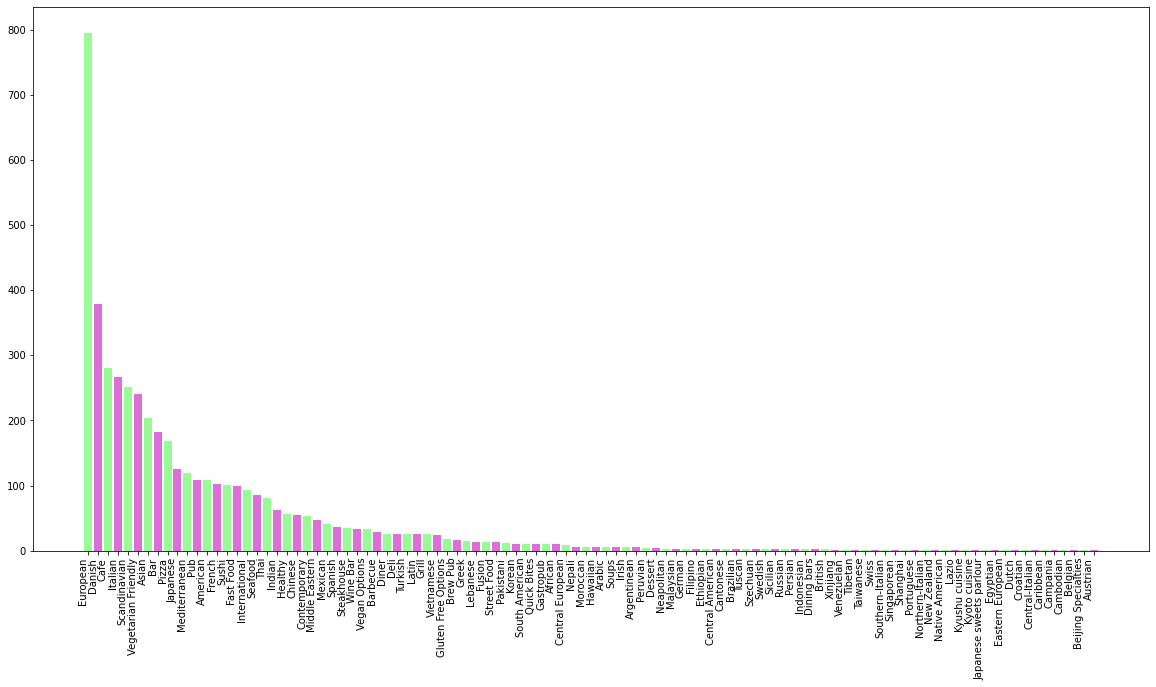

In [ ]:
CousineTypeFlat = [y for x in restaurant.CousineType for y in x]

keys, counts = np.unique(CousineTypeFlat, return_counts=True)

counts, keys = zip(*sorted(zip(counts, keys), reverse=True))

plt.figure(figsize=(20,10))
plt.bar(keys, counts, color = ('palegreen', 'orchid'))
plt.xticks(rotation=90, ha='right')
plt.show()

The same figure can be found in ***Milestone1.ipynb*** where we can see that European is the most popular dish 🇪🇺

However, since we are analyzing pizza restaurants, we need to filter out all the restaurants that don't offer pizza, or at least those who don't mention it as their CousineType 🇩🇰🍕

--- 

To do that, we need to split the **CousineType** column up and make **storeName** our index

In [ ]:
restaurant = restaurant.set_index('storeName')
Cousine = restaurant['CousineType'].apply(pd.Series)
Cousine

,0,1,2,3
storeName,,,,
Maple Casual Dining,International,European,Vegetarian Friendly,NaN
Keyser Social,Asian,Thai,Vegetarian Friendly,NaN
Restaurant Krebsegaarden,European,Scandinavian,Danish,NaN
The Olive Kitchen & Bar,International,European,Gluten Free Options,NaN
Ark,European,Contemporary,Healthy,NaN
...,...,...,...,...
Esperia Pizzabar 2000,Pizza,NaN,NaN,NaN
Cafe Juicy,Cafe,Healthy,NaN,NaN
Pizza 13,Pizza,NaN,NaN,NaN


✨Looks good, we see that the Column **CousineType** has been split up to 4 columns [0, 1, 2, 3].

Then we search those columns to see what restaurants offer pizza 🍕🤩

In [ ]:
pizza = Cousine[Cousine.eq('Pizza').any(1)]
pizza

,0,1,2,3
storeName,,,,
Madbaren Marmorkirken,Pizza,European,Vegetarian Friendly,NaN
Pizzeria Mamemi & Wine Bar,Italian,Pizza,Mediterranean,NaN
Ristorante Italiano,Italian,Pizza,European,NaN
Neighbourhood,Italian,Pizza,European,NaN
Restaurant Tio Marios,Italian,Pizza,European,NaN
...,...,...,...,...
Golden Pizza,Pizza,NaN,NaN,NaN
Bereket Pizzeria,Pizza,NaN,NaN,NaN
Carlos Pizza,Italian,Pizza,NaN,NaN


We can see again that 169 restaurants have **CousineType** as pizza, and that is the same number as we got above in the figure, so we are on the correct path 🕺🏽

The next step is to get the reviews for those restaurants. 
To do so, we need to get the *review* database and merge it with the pizza filtered restaurants.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="Reviews"></a>
## 1.2 Reviews 👩🏽‍🍳

### Read in for Jupyter and Google Colab 👓

We start by loading in the pickled file for the reviews which was cleaned in **Milestone1.ipynb** and take a look at it 🥒

In [ ]:
#for Jupyter
reviews = pd.read_pickle("reviews.pkl")

#for Google Colab
#with open('/content/reviews.pkl', "rb") as fh:
#  reviews = pickle.load(fh)

In [ ]:
reviews.head()

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating
0,Maple Casual Dining,918emmaf,2020-12-05,Exquisite,We visited Maple in Friday night and had a won...,5
1,Maple Casual Dining,hildurj2016,2020-11-19,Perfect wedding dinner,"Excellent food, drinks and service!! Me and my...",5
2,Maple Casual Dining,Judy B,2020-10-27,Beautifully Presented Food,I visited this restaurant on my first ever vis...,5
3,Maple Casual Dining,EldBjoern,2020-10-18,Very good food and very pleasant people,We ate dinner in their restaurant. The waiter ...,5
4,Maple Casual Dining,MacondoExpresss,2020-10-13,A lovely birthday dinner,Visited as a couple to celebrate my birthday. ...,5


Firstly, we need to remove the reviews for restaurants that do not have pizza as **CousineType**. This is done by merging the two dataframes on the column **storeName**

In [ ]:
pizza_reviews = pd.merge(reviews, pizza, how='inner',
                  left_on=['storeName'], right_on=['storeName'],
                  left_index=True)

...and check the columns in the new merged dataframe, *pizza_reviews* 👀

In [ ]:
pizza_reviews

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,0,1,2,3
0,Madbaren Marmorkirken,Dan123848,2021-03-27,Tasty food!,This place offers really tasty food at afforda...,5,Pizza,European,Vegetarian Friendly,NaN
0,Madbaren Marmorkirken,Discover440203,2020-10-24,One of best in Cph,"Great pizza in center Copenhagen, very good pr...",5,Pizza,European,Vegetarian Friendly,NaN
0,Madbaren Marmorkirken,DotanP1,2020-10-24,Excellent pizza,A bit more than a wall in the hole; passed by ...,5,Pizza,European,Vegetarian Friendly,NaN
0,Madbaren Marmorkirken,Florian F,2020-09-30,Good value for money but...,We have been reading many really positive revi...,3,Pizza,European,Vegetarian Friendly,NaN
0,Madbaren Marmorkirken,joaomilho2,2020-09-25,"Carefully crafted pizza. Thin,","Carefully crafted pizza. Thin, crispy crust an...",5,Pizza,European,Vegetarian Friendly,NaN
...,...,...,...,...,...,...,...,...,...,...
7,Made in Italy,MarionGreek,2015-07-31,One of the best pizza ever,I ha e to confess: I really love pizz,5,Italian,Pizza,Gastropub,NaN
7,Made in Italy,Victoria S,2015-07-28,BEST authentic italian pizza in copenhagen!,This is a little hello from italy. At this pla...,5,Italian,Pizza,Gastropub,NaN
7,Made in Italy,Zane B,2015-07-28,Best pizza in Copenhagen,I have been few times in Made in Italy and I a...,5,Italian,Pizza,Gastropub,NaN
7,Made in Italy,LeoHelsinki,2015-05-03,Great take away pizza!,Considering that they are using electric ovens...,5,Italian,Pizza,Gastropub,NaN


💥Awesome we have over 3500 reviews! 

Now let's see how many restaurants we have associated with these reviews

In [ ]:
pizza_reviews['storeName'].value_counts()

Neighbourhood                           972
Trattoria Fiat                          494
Baest                                   456
Pizzeria Mamemi & Wine Bar              446
La Vecchia Signora                      302
Restaurant Tio Marios                   163
Gorm's Magstræde                        129
Madbaren Marmorkirken                   119
Da Salvo                                110
La Vecchia Gastronomia Italiana          81
Madenitaly                               50
Nyhavn 14                                44
Perbacco                                 43
Made in Italy                            39
Quattro Fontane Italiensk Restaurant     38
Tony's Pizzeria                          34
Leifs Pizzeria                           11
Cafe Marzano                              6
Name: storeName, dtype: int64

We can see 👆🏼 that the restaurant Neighbourhood has the far most reviews. However, this is a short list compared to the total list of restaurants which have pizza as a **CousineType**. 

One of the reasons we observed was, for example, Pizza 13 was in the dataframe *pizza* but is not in the dataframe *pizza_reviews*. The reason for this is that there are no reviews for Pizza 13. By doing a Google Search, we found out this restaurant is permanently closed 🏚🍕

Nevertheless, for the restaurants we have in our dataframe *pizza_reviews*, we have multiple reviews to do text analysis for our research 🕵🏼‍♀️

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="Explore"></a>
## 1.3. Explore Merged Dataframe 🔍

For our initial research, exploratory data analysis can be done effectively using visualization 👀

Let's start by checking how the customers' reviews are distributed between rating 1 to 5 ⭐️ 

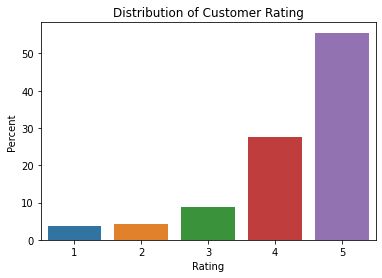

In [ ]:
ax = sns.barplot(data=pizza_reviews, x='rating', y='rating', estimator=lambda x: len(x) / len(pizza_reviews) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="Rating")
plt.title('Distribution of Customer Rating')
plt.show()

As can be seen in the plot above 👆🏼 over 50% percent of the reviews have a rating of 5. Moreover, reviews with a rating of 4 are around 30%. 

Next, it is good to see the average rating of restaurants with pizza as **CousineType** in Copenhagen over the years. Or they getting better or worse? 🤷🏽‍♀️

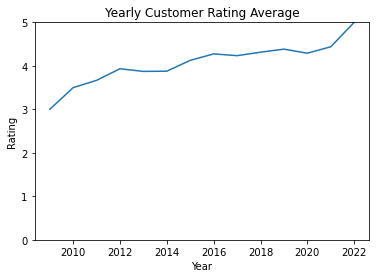

In [ ]:
pizza_reviews['ratingDate'] = pd.to_datetime(pizza_reviews['ratingDate'])
data_pizza = pizza_reviews.set_index('ratingDate')

plt.plot(data_pizza['rating'].resample('Y').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Yearly Customer Rating Average')
plt.ylim(0,5)
plt.show()

👆🏼 Because the plot above, is for the average rating, we don't get any ratings under 3 due to the ratings of 1 to 3 are under 20% in total. However, from the plot above, we can see that customers are giving restaurants with pizza as **CousineType** higher ratings in recent years. 


<img src="https://media.giphy.com/media/jn2iXu2HRpMuovBrrV/giphy.gif" width="400" align="left">

 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<a id="TextPreProcessing"></a>
# 2. Text Preprocessing 💬

The same steps were taken as in Lecture 2: *Text Analytics, Text Preprocessing*, to do the data cleaning on our reviews: 

    1. Removing punctuation
    2. Converting text to lowercase
    3. Removing stopwords
    4. Stemming or lemmatizing


In order to clean the text, we first need to do some imports:

In [ ]:
from stop_words import get_stop_words 
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stop_words=get_stop_words('en') + ['u'] # we added "u" to our stopwords, as we could see that it appeared often

In [ ]:
def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in stop_words])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])

    return text

***Reference***: Code from Lecture 2

Now we have the relevant function to do our reviews cleaning, and therefore implement it on our dataframe *pizza_reviews*. The cleaned reviews will be in a column named ***reviews_cleaned*** 🧹

In [ ]:
pizza_reviews['reviews_clean'] = pizza_reviews['reviewText'].apply(text_processing)
pizza_reviews.head()

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,0,1,2,3,reviews_clean
0,Madbaren Marmorkirken,Dan123848,2021-03-27,Tasty food!,This place offers really tasty food at afforda...,5,Pizza,European,Vegetarian Friendly,NaN,place offer really tasty food affordable price...
0,Madbaren Marmorkirken,Discover440203,2020-10-24,One of best in Cph,"Great pizza in center Copenhagen, very good pr...",5,Pizza,European,Vegetarian Friendly,NaN,great pizza center copenhagen good price good ...
0,Madbaren Marmorkirken,DotanP1,2020-10-24,Excellent pizza,A bit more than a wall in the hole; passed by ...,5,Pizza,European,Vegetarian Friendly,NaN,bit wall hole passed couple time find
0,Madbaren Marmorkirken,Florian F,2020-09-30,Good value for money but...,We have been reading many really positive revi...,3,Pizza,European,Vegetarian Friendly,NaN,reading many really positive review madbaren m...
0,Madbaren Marmorkirken,joaomilho2,2020-09-25,"Carefully crafted pizza. Thin,","Carefully crafted pizza. Thin, crispy crust an...",5,Pizza,European,Vegetarian Friendly,NaN,carefully crafted pizza thin crispy crust vege...


💥Great! 

Now the *pizza_reviews* dataframe has the new column **reviews_cleaned**. We can now go into analyzing the reviews!

 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<a id="Analyzing"></a>
# 3. Analyzing the Reviews by Ratings ⭐️

In this chapter, we will split the reviews into three groups: 
* The **first** group is reviews of ratings 4 and 5,
* the **second** is reviews of ratings 2 and 3,
* and **third** reviews with ratings of 1. 

Each section will include:

* WordCloud ☁️
* Frequency of words ☝🏼
* Frequency of what two words are most often used together ✌🏼

<a id="AllRatings"></a>
## 3.1 All Ratings 🙌🏼

Firstly, let's start by analyzing the reviews as a whole despite the ratings

<a id="WordCloud"></a>
### WordCloud ☁️

In [ ]:
def show_wordcloud(file, title):
    text = ' '.join(file['reviewText'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud( stopwords=stopwords,
        max_font_size=100, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10,5), frameon=True)
    plt.imshow(fig_wordcloud, interpolation="bilinear")  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

***Reference***: Code from Lecture 2

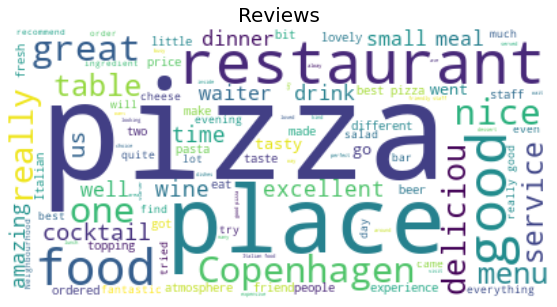

In [ ]:
show_wordcloud(pizza_reviews, 'Reviews');

The picture above shows that <font color='green'>pizza </font> is the most frequent word, also looks like <font color='green'>place</font>, <font color='green'>restaurant</font>, <font color='green'>food </font> and <font color='green'>good </font> are very common. 
However, it can be hard to only visualize the words to get the correct estimation of what a good review contains.

So let's check their frequency as well. 

<a id="Frequency"></a>
### Frequency 📊
Let's take a look at what words are the most common in the reviews.

In [ ]:
def frequency(review, x, display):
  cv = CountVectorizer(stop_words=stop_words, ngram_range=(x,x))
  count_vector = cv.fit_transform(review['reviews_clean'])
  df = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())
  
  freq = pd.DataFrame(df.sum(axis=0)).reset_index()
  freq.columns = ['Words', 'Frequency']
  freq = freq.sort_values(by='Frequency', ascending=False).head(display) 
  return freq

***References***: Code based on code from this [site](https://kavita-ganesan.com/how-to-use-countvectorizer/#.YJKFoH0zada)

The function takes in what review dataframe you want to use, how many n-grams you want, and finally how many words you want to display, the list is sorted that the highest frequency appears first 👑

In [ ]:
def frequency_plot(review):
  plt.figure(figsize=(15,5))
  plt.hist(review.Words, weights = review.Frequency, bins = len(review), color = 'sandybrown')
  plt.xticks(rotation=90)
  plt.show();

The **frequency_plot** function takes in the frequency list we created by using **frequency** function and displays the words in a histogram 👀📊

---

Let's start by applying the **frequency** function to all ratings and get the 50 most frequent words used.

In [ ]:
all_reviews = frequency(pizza_reviews, 1, 50)
all_reviews

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
4786,pizza,3597
2987,good,1600
2758,food,1328
4821,place,1277
3039,great,1203
5370,restaurant,1053
5714,service,1008
5202,really,885
1650,copenhagen,811
4302,nice,777


We can see that the **WordCloud** was correct and <font color='orange'>pizza</font>	is the most common word with 3597 counts, then <font color='orange'>good</font>	is mentioned 1600 times and the next ones are <font color='orange'>food</font>, <font color='orange'>place</font>, and <font color='orange'>great</font> with around 1200 counts.

We mentioned above that the word <font color='red'>restaurant</font> looked like being in the top 3, however that is number 6, which is still pretty good. But it tells us that WordCloud can be deceiving, perhaps because "restaurant" is a longer word than the others.

--- 

👀 Let's visualize the most frequent words using **frequent_plot**

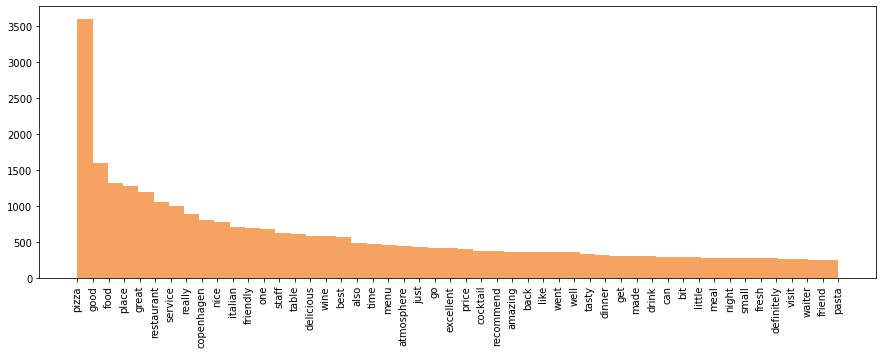

In [ ]:
frequency_plot(all_reviews)

Same can been seen in the WordCloud, <font color='orange'>pizza</font> is by far the most common word.

👫🏽 Let's now take a look at the top 50 most frequent word combinations for all reviews, that is what TWO words are the most common. 

We use the **frequency** function, put in *all_ratings*, and choose 2 ngrams.

In [ ]:
all_reviews_2= frequency(pizza_reviews, 2, 50)
all_reviews_2

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
4779,best pizza,227
37379,really good,149
18622,friendly staff,137
20034,good pizza,127
23579,italian food,114
20690,great pizza,109
33973,pizza good,108
23658,italian restaurant,102
31169,one best,100
21737,highly recommend,98


👆🏼 We see that <font color='orange'>best pizza </font> is the most common combination of two words for all reviews! That supports the rating distribution, most people who leave reviews for those restaurants are happy with the pizzas 🤩🍕

👀 Let's visualize the two most frequent words for all ratings

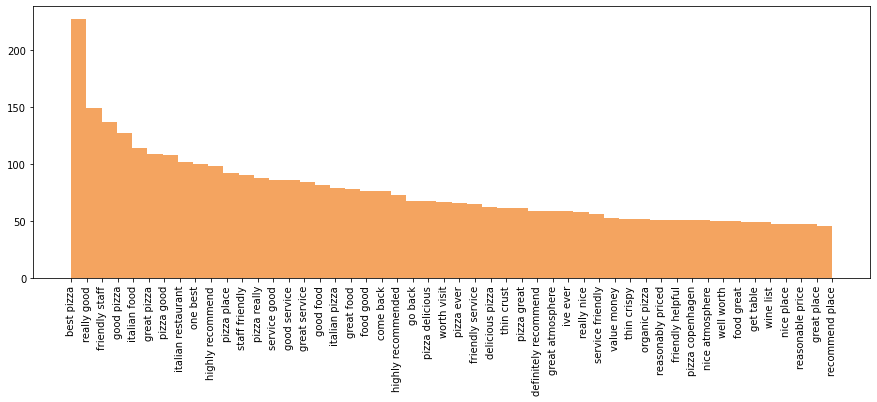

In [ ]:
frequency_plot(all_reviews_2)

☝🏼 We see that <font color='orange'>best pizza </font> is by far the most used combination for all reviews. <font color='orange'>Really good, friendly staff </font>and <font color='orange'>good pizza</font> come next. Other combinations look also rather positive 🙌🏼 

What is also interesting here, is that the customers value the price as can be seen with the words combination <font color='orange'>value money</font> and <font color='orange'> reasonably priced</font>.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="4-5Reviews"></a>
## 3.2 Reviews: 4 and 5 Stars ⭐️

Let's now analyze only 4 and 5 stars reviews. Hopefully, we can learn something useful on how to run a successful pizza place.

Firstly, we created a column that combines great reviews, that is 4-5 stars reviews, called **GreatReviews**. This column is a dummy variable that tells us if it is a great review or not (1/0) 👏🏼

In [ ]:
 pizza_reviews['GreatReviews'] = pizza_reviews['rating'].apply(lambda x: 1 if x >= 4 else 0) 

In [ ]:
pizza_reviews.head()

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,0,1,2,3,reviews_clean,GreatReviews
0,Madbaren Marmorkirken,Dan123848,2021-03-27,Tasty food!,This place offers really tasty food at afforda...,5,Pizza,European,Vegetarian Friendly,NaN,place offer really tasty food affordable price...,1
0,Madbaren Marmorkirken,Discover440203,2020-10-24,One of best in Cph,"Great pizza in center Copenhagen, very good pr...",5,Pizza,European,Vegetarian Friendly,NaN,great pizza center copenhagen good price good ...,1
0,Madbaren Marmorkirken,DotanP1,2020-10-24,Excellent pizza,A bit more than a wall in the hole; passed by ...,5,Pizza,European,Vegetarian Friendly,NaN,bit wall hole passed couple time find,1
0,Madbaren Marmorkirken,Florian F,2020-09-30,Good value for money but...,We have been reading many really positive revi...,3,Pizza,European,Vegetarian Friendly,NaN,reading many really positive review madbaren m...,0
0,Madbaren Marmorkirken,joaomilho2,2020-09-25,"Carefully crafted pizza. Thin,","Carefully crafted pizza. Thin, crispy crust an...",5,Pizza,European,Vegetarian Friendly,NaN,carefully crafted pizza thin crispy crust vege...,1


Let's now check the number of reviews which are 4 & 5 stars, and 3 stars and below:

In [ ]:
print('The total amount of reviews 4 & 5:', len(pizza_reviews[pizza_reviews['GreatReviews'] == 1]))
print('The total amount of reviews of 3 and below: ',len(pizza_reviews[pizza_reviews['GreatReviews'] == 0]))

The total amount of reviews 4 & 5: 2943
The total amount of reviews of 3 and below:  594


👀 It's always good to visualize the results, so let's do that



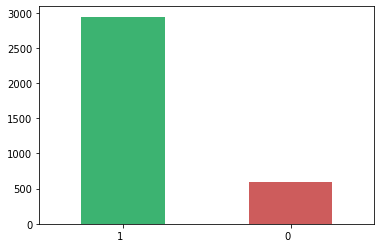

In [ ]:
pizza_reviews['GreatReviews'].value_counts().plot(kind='bar', color = ('mediumseagreen', 'indianred'))
plt.xticks(rotation=360, ha='right');

As observed before, most reviews are 4 and 5 stars ratings. Therefore, we can see that the majority gives great reviews for pizza places in Copenhagen 💯🍕🇩🇰

### WordCloud ☁️

Now, let's visualize the 4-5 star ratings in a WordCloud. 

<font color='gray'>*The function can be found under [All Ratings - WordCloud](#WordCloud)*</font>

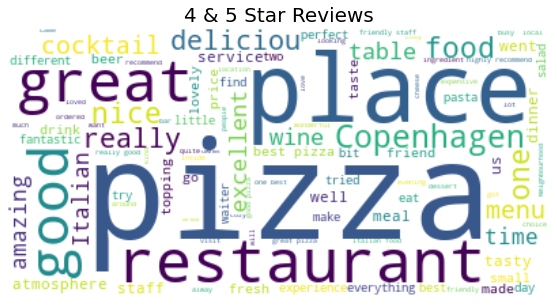

In [ ]:
show_wordcloud(pizza_reviews[pizza_reviews.GreatReviews==1], '4 & 5 Star Reviews');

We get very similar results as for all ratings, that is <font color='green'>pizza </font> looks like the most common word along with <font color='green'>place</font>, <font color='green'>restaurant</font>, and <font color='green'>good</font>.

Let's also count their frequency.

### Frequency 📊

<font color='gray'>*The function can be found under: [All Ratings - Frequency](#Frequency)*</font>

👩🏽‍🍳Start by finding the top 20 single most frequent words for good reviews

In [ ]:
good = pizza_reviews[pizza_reviews['GreatReviews'] == 1]
good_reviews = frequency(good, 1, 20)
good_reviews

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
4085,pizza,3026
2553,good,1326
2599,great,1131
4113,place,1082
2351,food,1073
4568,restaurant,859
4858,service,800
4433,really,734
1397,copenhagen,710
3682,nice,662


Same as for all ratings, <font color='red'>restaurant </font> appears more common in the WordCloud than it actually does! 

<font color='orange'>Pizza</font>	appears 3026 times, <font color='orange'>good</font> 1326 times, <font color='orange'>great</font>	1131, <font color='orange'>place</font>	1082 and <font color='orange'>food</font> 1073.

👀 Again, let's visualize them

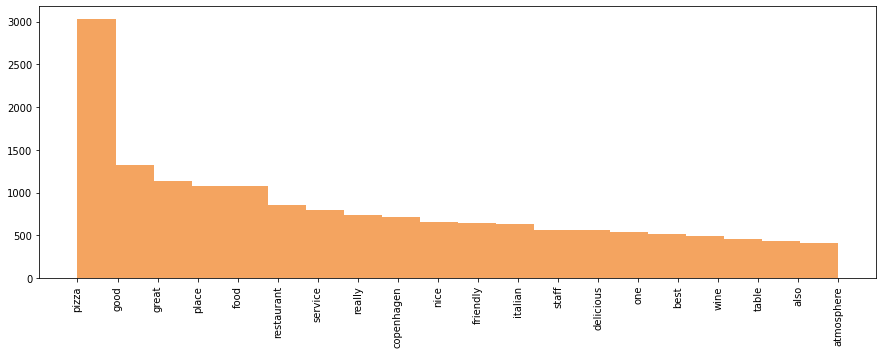

In [ ]:
frequency_plot(good_reviews)

<font color='orange'>Pizza</font> is 50% more common then the next word, interesting 💡

👫🏽 Let's now take a look at the top 20 most frequent word combinations for good reviews

In [ ]:
good_reviews_2 = frequency(good, 2, 20)
good_reviews_2

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
3710,best pizza,214
29660,really good,132
14789,friendly staff,131
16482,great pizza,106
15936,good pizza,102
18758,italian food,99
17314,highly recommend,96
24733,one best,94
26947,pizza good,91
34279,staff friendly,86


Wow, the top word combinations are the same as for all reviews. That makes sense since over 50% of all reviews are rating between 4 and 5 stars 🙌🏼

👀 Let's visualize the two most frequent words

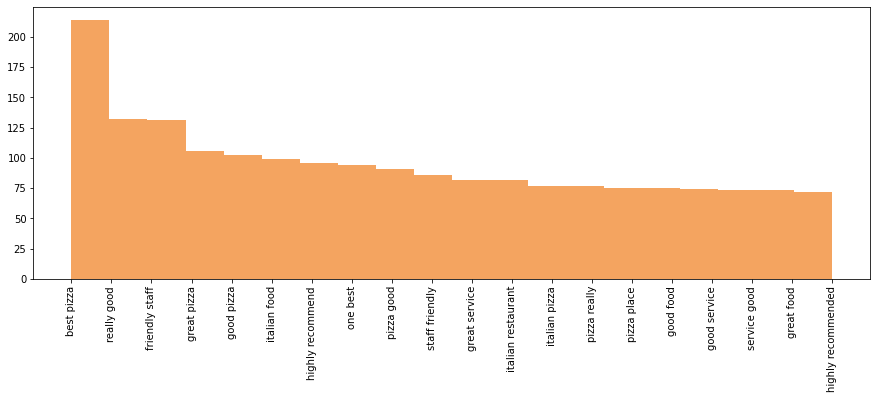

In [ ]:
frequency_plot(good_reviews_2)

Looks like in order to get great reviews you need to at least serve <font color='orange'> great pizza</font> and offer <font color='orange'>good service</font> with <font color='orange'>friendly staff</font> - that however feels kind of obvious 🤓

Also, <font color='orange'>italian food</font> is high, so maybe the pizzas need to be more Italian rather than New Yorkers or Chicago Pizzas 🇮🇹 🤌🏼

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="2-3Reviews"></a>
## 3.3 Reviews: 2 and 3 Stars ⭐️

### WorldCloud ☁️

Let's view the 2 and 3 stars ratings in a WordCloud

<font color='gray'>*The function can be found under [All Ratings - WordCloud](#WordCloud)*</font>


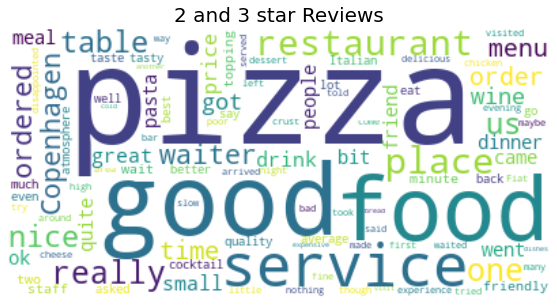

In [ ]:
show_wordcloud(pizza_reviews.loc[pizza_reviews['rating'].isin([2,3])], '2 and 3 star Reviews');

Again <font color='green'>pizza </font> looks like the most common word along with <font color='green'>food </font> and <font color='green'>good</font>. However, <font color='green'>service </font> also looks like being a common word. Therefore, it is interesting to see what word is coming before or after the word <font color='green'>service</font>.

But firstly, let's count their frequency:

### Frequency 📊

We start by finding the top 20 most frequent words for alright reviews using the function **frequency**.

*Alright reviews* are defined as ratings from 2 to 3.

<font color='gray'>*The function can be found under: [All Ratings - Frequency](#Frequency)*</font>

In [ ]:
alright = pizza_reviews.loc[pizza_reviews['rating'].isin([2,3])]
alright_reviews = frequency(alright, 1, 20)
alright_reviews

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
1812,pizza,467
1102,good,239
1026,food,210
2175,service,164
2043,restaurant,160
1823,place,155
1982,really,122
1678,one,106
2418,table,106
1612,nice,99


<font color='orange'>Pizza</font>	appears 467 times. Note that for great reviews it appeared 3026 times that shows how much more great reviews we have. <font color='orange'>Good</font> 239 times, <font color='orange'>food</font> 210, and <font color='orange'>service</font>	164 times. 

These are mainly the same words we have been dealing with, however, they are in a different order. 
Seeing that we have service as the fourth most common word, it is interesting to see what word they are associated with, is it good service or bad?

👀 Let's first visualize the most frequent words then we will dive into the word combinations.

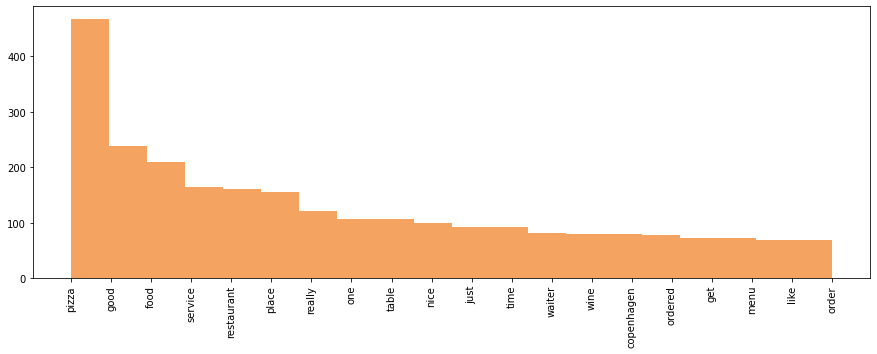

In [ ]:
frequency_plot(alright_reviews)

The interesting words here for reviews with ratings 2 and 3, are <font color='orange'>service</font>, as mentioned before but also <font color='orange'>table</font> and <font color='orange'>time</font>. These words were not appearing before when analyzing reviews with ratings 4 and 5.

👫🏽 Now, let's take a look at the top 20 most frequent word combinations for alright reviews

In [ ]:
alright_reviews_2 = frequency(alright, 2, 20)
alright_reviews_2

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
3998,good pizza,22
3491,food good,19
4696,italian restaurant,17
6902,pizza good,16
7708,really good,15
977,best pizza,13
8477,service good,13
4686,italian food,13
6973,pizza place,13
7822,red wine,13


If we check <font color='orange'>service</font> we can see that reviewers mean <font color='orange'>good service</font>. However, we can also see some combinations that are not so good. They are <font color='orange'>nothing special</font> and <font color='orange'>long time</font>. As mentioned before, <font color='orange'>time</font> had not appeared in the reviews for ratings 4 and 5, and therefore it is crucial to not have the customers wait a long time to get a great review. 

👀 Let's plot those words

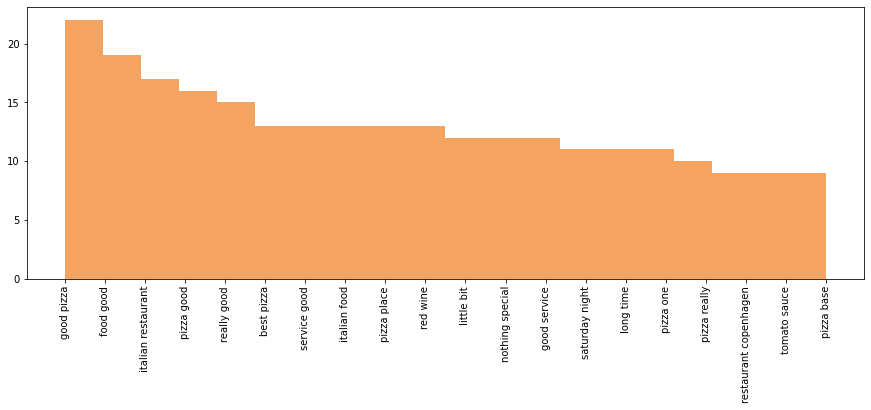

In [ ]:
frequency_plot(alright_reviews_2)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="1Review"></a>
## 3.4 Reviews: 1 Star ⭐️

### WordCloud ☁️

Now, let's view the "bad" reviews in a WordCloud, will they be similar to what we have seen before?

<font color='gray'>*The function can be found under [All Ratings - WordCloud](#WordCloud)*</font>

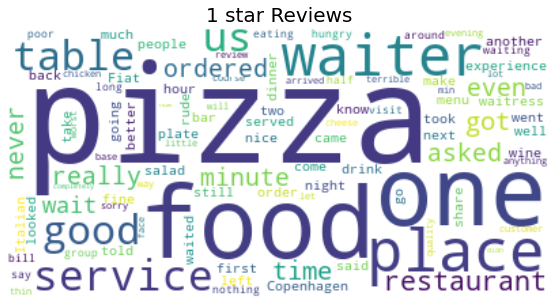

In [ ]:
show_wordcloud(pizza_reviews[pizza_reviews.rating==1], '1 star Reviews');

👆🏼 Alright, <font color='green'>pizza</font> is still the most common word. Then we have <font color='green'>one</font> and <font color='green'>food</font>. 

It will be interesting to see what words they are involved with 🔍

### Frequency 📊

Like we have seen the WordCloud can be a little bit misleading, so let's use the **frequency** function by finding the top 20 most frequent words for bad reviews

<font color='gray'>*The function can be found under: [All Ratings - Frequency](#Frequency)*</font>

In [ ]:
bad = pizza_reviews[pizza_reviews['rating'] == 1]
bad_reviews = frequency(bad, 1, 20)
bad_reviews

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
915,pizza,104
504,food,45
1088,service,44
1206,table,41
850,one,41
919,place,40
1321,waiter,39
546,good,35
1024,restaurant,34
699,like,34


We have a lot of interesting words there that could either be something bad or good, e.g. <font color='orange'>food</font>, <font color='orange'>service</font>, <font color='orange'>one</font>, <font color='orange'>waiter</font> and <font color='orange'>minute</font>. Moreover, the word <font color='orange'>time</font> appears again frequently for a one-star review!

👀 Let's Visualize the most frequent words

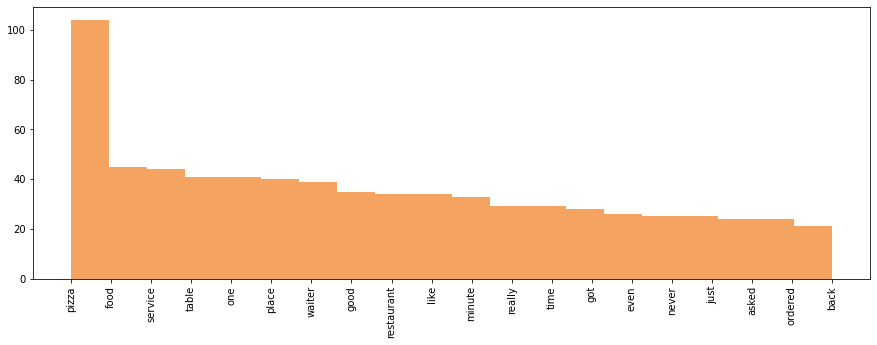

In [ ]:
frequency_plot(bad_reviews)

As always, <font color='orange'>pizza</font> is by far the most used word in these reviews 🍕📝

👫🏽 Now, let's find out the top 25 most frequent word combinations for bad reviews

In [ ]:
bad_reviews_2 = frequency(bad, 2, 25)
bad_reviews_2

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Words,Frequency
1825,minute later,7
1,10 minute,6
2388,really bad,6
19,20 minute,6
374,booked table,6
2214,pizza share,6
1055,first time,5
3078,two pizza,5
2646,service terrible,5
1608,like one,4


Now, we are getting different results than we have been seeing! 
<font color='orange'>Service</font> is now connected to <font color='orange'>service terrible</font>, and we have <font color='orange'>really bad</font>. Moreover, it looks like customers are getting served slowly or not at all! As most of us know, customer service is really important when running a business, and we can see that customer service is bad when restaurants are receiving reviews with 1-star rating. 

👀 Finally, let's visualize the two most frequent words for bad reviews

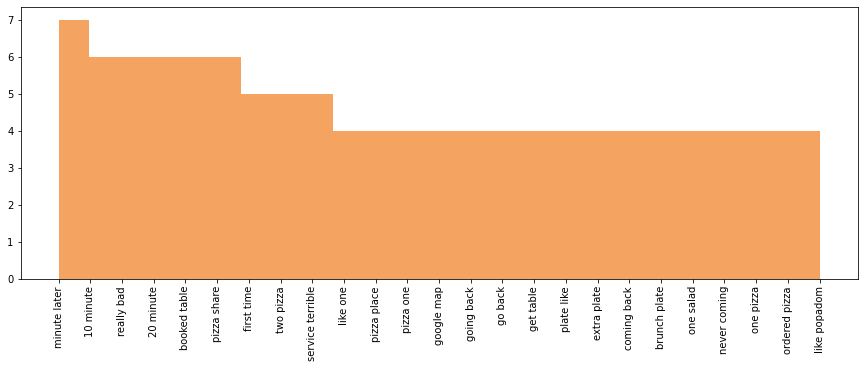

In [ ]:
frequency_plot(bad_reviews_2)

Looks like they are all mentioning slow or bad service. However, these reviews are not that many as we found out in [Exploring Merged Dataset](#Explore), they are below 5% of all the reviews. Therefore, it is difficult to make a statement about these reviews. Nonetheless, they give an insight into what to be aware of when running a pizza restaurant.

 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<a id="Location"></a>
# 4. Location 🗺

Let's look at the location of the pizza restaurants. 🍕 
Does the location affect the reviews?

In *Milestone.ipynb* we gathered information about the latitude and longitude for each restaurant and saved it under *restaurants.pkl* as mentioned before. 


We start by grouping together the restaurants found in *pizza_reviews* dataframe. Then, we set the **storeName** as an index so we can merge it with *restaurants.pkl* to get the latitude and longitude for each restaurant that serves pizza 🍕


In [ ]:
pizza_restaurants = pizza_reviews.groupby(['storeName'], axis=0, as_index=False).sum()
pizza_restaurants.set_index('storeName')

,rating,GreatReviews
storeName,,
Baest,1821,331
Cafe Marzano,28,6
Da Salvo,454,89
Gorm's Magstræde,543,107
La Vecchia Gastronomia Italiana,291,50
La Vecchia Signora,1228,239
Leifs Pizzeria,49,10
Madbaren Marmorkirken,583,116
Made in Italy,185,37


👆🏼 Above, we can see all the restaurants that serve pizza along with the sum of their **rating** and **GreatReviews**; that is a count of how often they get reviews between 4 and 5 stars as found out in [Reviews: 4 - 5 Stars ⭐️](#4-5Reviews) 

--- 

Now we find the restaurant location by merging *pizza_restaurants* and *restaurant* dataframe together on **storeName** in a new dataframe called *rest_loc*:

In [ ]:
rest_loc = pd.merge(pizza_restaurants, restaurant, how='inner',
                  left_on=['storeName'], right_on=['storeName'],
                  left_index=True)
rest_loc.head()

,storeName,rating,GreatReviews,storeAddress,avgRating,nrReviews,priceCategory,CousineType,all_ranks,all_ratings,lat,lon,location
287,Baest,1821,331,"Guldbergsgade 29, Copenhagen 2200 Denmark",4.0,825,2.5,"[Italian, Pizza, European]","[#32 of 238 Italian in Copenhagen, #273 of 1,9...","[(Food, 4.0), (Service, 4.0), (Value, 3.5), (A...",55.6793579,12.5749273,"Bæst, Klosterstræde, Christianshavn, København..."
652,Cafe Marzano,28,6,"Lundsgade 7, Copenhagen 2100 Denmark",4.5,21,1.0,"[Italian, Pizza, European]","[#87 of 238 Italian in Copenhagen, #618 of 1,9...","[(Food, 4.5), (Service, 5.0), (Value, 5.0)]",55.691499,12.57721,"Cafe Marzano, Lundsgade, Nyboder, Frederikssta..."
168,Da Salvo,454,89,"Gammel Kongevej 41 Frederiksberg, Copenhagen 1...",4.5,305,2.5,"[Italian, Pizza, Mediterranean]","[#163 of 1,971 Restaurants in Copenhagen]","[(Food, 4.5), (Service, 4.5), (Value, 4.5), (A...",55.6735564,12.5547358,"Gammel Kongevej, Frederiksberg, Frederiksberg ..."
267,Gorm's Magstræde,543,107,"Magstraede 16, Copenhagen 1204 Denmark",4.0,270,2.5,"[Italian, Pizza, European]","[#28 of 238 Italian in Copenhagen, #256 of 1,9...","[(Food, 4.0), (Service, 4.0), (Value, 4.0), (A...",55.6763055,12.5751455,"Gorm's, Magstræde, Christianshavn, København, ..."
628,La Vecchia Gastronomia Italiana,291,50,"Falkoner Alle 17, Frederiksberg, Copenhagen 20...",3.5,202,2.5,"[Italian, Pizza, Mediterranean]","[#11 of 22 Italian in Frederiksberg, #34 of 19...","[(Food, 4.0), (Service, 3.5), (Value, 3.5), (A...",55.680632,12.5337297,"La Vecchia Gastronomia Italiana, Falkoner Alle..."


💥 Great! Now we have the rating, latitude, and longitude available in the same dataframe. 
However, we also have some additional columns that we don't need for this section. We only need **GreatReviews**, **lat**, and **lon**, also it is good to have the **storeAddress**. 

We drop the rest of the columns, sort **GreatReviews** from highest to lowest, thus the top restaurant has the highest count of good ratings. Finally, we make **storeName** as an index. 

In [ ]:
#drop columns
rest_loc = rest_loc.drop(columns=['rating', 'avgRating', 'nrReviews', 'priceCategory', 'CousineType', 
                        'all_ranks', 'all_ratings', 'location'])
#sort 
rest_loc = rest_loc.sort_values(by='GreatReviews', ascending=False)

#index
rest_loc = rest_loc.set_index('storeName')

rest_loc

,GreatReviews,storeAddress,lat,lon
storeName,,,,
Neighbourhood,832,"Istedgade 27, Copenhagen 1650 Denmark",55.6706228,12.5583787
Neighbourhood,832,"Jaegersborggade 56, Copenhagen 2200 Denmark",55.6706228,12.5583787
Pizzeria Mamemi & Wine Bar,425,"Mysundegade 28, Copenhagen 1668 Denmark",55.667879,12.547963
Trattoria Fiat,379,"Kongens Nytorv 18 Kbh K, Copenhagen 1050 Denmark",55.6813679,12.5858844
Baest,331,"Guldbergsgade 29, Copenhagen 2200 Denmark",55.6793579,12.5749273
La Vecchia Signora,239,"Gronnegade 12/14, Copenhagen 1107 Denmark",55.6809107,12.5824969
Restaurant Tio Marios,140,"Amerika Plads 4 Østerbro, Copenhagen 2100 Denmark",55.6983219,12.5939267
Madbaren Marmorkirken,116,"Store Kongensgade 77, Copenhagen 1264 Denmark",55.685248,12.5883371
Gorm's Magstræde,107,"Magstraede 16, Copenhagen 1204 Denmark",55.6763055,12.5751455


💥 Looks good! 
However, we see that one restaurant is missing latitude and longitude, Madenitaly. 

So, we manually find the latitude and longitude from [this](https://www.latlong.net/) website.
* Latitude: 55.678360
* Longitude: 12.590190

Also, we see that Neighborhood has two restaurants and they are located in different parts of Copenhagen, howeverm they get the same latitude and longitude, so we need to fix that as well.

For [0], Istedgade 27, Copenhagen 1650 Denmark:
* Latitude: 55.670630
* Longitude: 12.558420

For [1]: Jaegersborggade 56, Copenhagen 2200 Denmark
* Latitude: 55.693860
* Longitude: 12.542540

We can see that both restaurants contain the coordinates for Istegade, so we need to change Neighborhood at Jaegersborggade also.

In [ ]:
rest_loc.at['Madenitaly', 'lat'] = 55.678360
rest_loc.at['Madenitaly', 'lon'] = 12.590190
rest_loc.iloc[1, rest_loc.columns.get_loc('lat')] = 55.693860
rest_loc.iloc[1, rest_loc.columns.get_loc('lon')] = 12.542540

💥 Great!
Now, let's see how it looks like

In [ ]:
rest_loc

,GreatReviews,storeAddress,lat,lon
storeName,,,,
Neighbourhood,832,"Istedgade 27, Copenhagen 1650 Denmark",55.6706228,12.5583787
Neighbourhood,832,"Jaegersborggade 56, Copenhagen 2200 Denmark",55.6939,12.5425
Pizzeria Mamemi & Wine Bar,425,"Mysundegade 28, Copenhagen 1668 Denmark",55.667879,12.547963
Trattoria Fiat,379,"Kongens Nytorv 18 Kbh K, Copenhagen 1050 Denmark",55.6813679,12.5858844
Baest,331,"Guldbergsgade 29, Copenhagen 2200 Denmark",55.6793579,12.5749273
La Vecchia Signora,239,"Gronnegade 12/14, Copenhagen 1107 Denmark",55.6809107,12.5824969
Restaurant Tio Marios,140,"Amerika Plads 4 Østerbro, Copenhagen 2100 Denmark",55.6983219,12.5939267
Madbaren Marmorkirken,116,"Store Kongensgade 77, Copenhagen 1264 Denmark",55.685248,12.5883371
Gorm's Magstræde,107,"Magstraede 16, Copenhagen 1204 Denmark",55.6763055,12.5751455


Awesome, now the restaurants' Neighbourhood have different coordinates and Madenitaly got one 🤩

---

Now we need to remove **storeName** as an index for the next step

In [ ]:
rest_loc = rest_loc.reset_index()
rest_loc

,storeName,GreatReviews,storeAddress,lat,lon
0,Neighbourhood,832,"Istedgade 27, Copenhagen 1650 Denmark",55.6706228,12.5583787
1,Neighbourhood,832,"Jaegersborggade 56, Copenhagen 2200 Denmark",55.6939,12.5425
2,Pizzeria Mamemi & Wine Bar,425,"Mysundegade 28, Copenhagen 1668 Denmark",55.667879,12.547963
3,Trattoria Fiat,379,"Kongens Nytorv 18 Kbh K, Copenhagen 1050 Denmark",55.6813679,12.5858844
4,Baest,331,"Guldbergsgade 29, Copenhagen 2200 Denmark",55.6793579,12.5749273
5,La Vecchia Signora,239,"Gronnegade 12/14, Copenhagen 1107 Denmark",55.6809107,12.5824969
6,Restaurant Tio Marios,140,"Amerika Plads 4 Østerbro, Copenhagen 2100 Denmark",55.6983219,12.5939267
7,Madbaren Marmorkirken,116,"Store Kongensgade 77, Copenhagen 1264 Denmark",55.685248,12.5883371
8,Gorm's Magstræde,107,"Magstraede 16, Copenhagen 1204 Denmark",55.6763055,12.5751455
9,Da Salvo,89,"Gammel Kongevej 41 Frederiksberg, Copenhagen 1...",55.6735564,12.5547358


🌏 Looks like the dataset is ready to plot and see where the best restaurants are located.

---

In order to see better what are the best restaurant out of the list we have, we separate them by colors:
* The top restaurant, with the most Great Reviews is <font color='green'>green</font>
* The rest of the top 5 restaurants are <font color='red'> red </font>
* The remaining ones are <font color='blue'>blue</font>

In [ ]:
locations = rest_loc[['lat', 'lon']]
locations['lat'] = locations['lat'].astype(float)
locations['lon'] = locations['lon'].astype(float)
locationlist = locations.values.tolist()

map = folium.Map(location=[55.68,	12.56], zoom_start=13)
folium.Marker(locationlist[0], popup=rest_loc['storeName'][0], icon=folium.Icon(color='green')).add_to(map)
folium.Marker(locationlist[1], popup=rest_loc['storeName'][1], icon=folium.Icon(color='green')).add_to(map)
for point in range(2, 6): 
     folium.Marker(locationlist[point], popup=rest_loc['storeName'][point], icon=folium.Icon(color='red')).add_to(map)
for point in range(7, 18):
     folium.Marker(locationlist[point], popup=rest_loc['storeName'][point], icon=folium.Icon(color='blue')).add_to(map)
map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


From the map, we can see that the best restaurant Neighbourhood, is located both in Vesterbro and Norrebro. Moreover, by looking at the map, we can see that the location of the restaurant is not relevant for getting a great review.

Lastly, we can see that one restaurant is located outside of Copenhagen, Tony's Pizzeria. This restaurant is located in Slagelse. However, by doing a simple Google search, we found out that this restaurant is also located in Vesterbro, Copenhagen. Therefore, it most likely did not get the right latitude and longitude in our dataset. In other words, it was placed in Slagelse because there is as well a Tony's Pizzeria restaurant. 
In this analyis the location of the restaurant doesn't seem to be affecting the review rate, and therefore we don't need to anything to correct this. 

As we are still interested in finding out if the location matters and what areas within Copenhagen are trending. We will gather more data from TripAdvisor and look further into that in another Notebook 📚

 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<a id="SentimentAnalysis"></a>
# 5. Sentiment Analysis ✍🏼

As mentioned in the Introduction, we are consultants for a company that wants to know more about how to run a pizza restaurant, which gets great reviews and is therefore most likely going to be popular. The reason why many restaurants are focusing on great reviews is that today, most people look at the restaurants from the views of reviews, and decides from that where to eat. Furthermore, the company wanted to know what to be aware of. Thus, we are now going to do feature importance on the words in the reviews. That is, analyze reviews by their polarity score, and therefore find the most important words associated with positive and negative reviews.

Not only do we want to know what are the most common words are, but also what is the content of the review telling us? Sentiment Analysis can help us understand if the reviews are good or bad regardless of the review rating. It will be interesting to see if we will get the same results as before  🤷🏽‍♂️  

In this section, we used the following codes from [this](https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb) and [this](https://medium.com/analytics-vidhya/restaurant-reviews-sentiment-analysis-and-reccomendation-9bdf31a0b20) websites. Furthermore, we used **Lecture 2**, **Text Analytics**, to assist us in the modeling part. However, we had to adapt and change the reference codes to our dataset 👩🏽‍💻




<a id="Classification"></a>
## 5.1 Classification 🤖

We have already created a column in the *pizza_reviews* dataframe called ***GreatReviews*** (that will be our sentiment), where if reviews are 4 and 5 stars ratings, they get 1. Conversely, reviews with ratings 3 and below, get 0.

In [ ]:
pizza_reviews.GreatReviews.value_counts(normalize=True)

1    0.832061
0    0.167939
Name: GreatReviews, dtype: float64

As we saw before, positive reviews are dominant. In other words, over 83% of our dataset. 💥

Secondly, we create a new column named **polarity**. We import the Python library **TextBlob** which provides a simple API for diving into Natural Language Processing (NLP) tasks such as sentiment analysis and classification. 

We use the *TextBlob* on our column **reviews_clean** to get the polarity score of each review. The polarity score is a float between -1.0 and 1.0. Therefore, the polarity score tells us if we have a negative or positive review 📝

In [ ]:
from textblob import TextBlob
pizza_reviews['polarity'] = pizza_reviews['reviews_clean'].map(lambda text: TextBlob(text).sentiment.polarity)
pizza_reviews.head()

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating,0,1,2,3,reviews_clean,GreatReviews,polarity
0,Madbaren Marmorkirken,Dan123848,2021-03-27,Tasty food!,This place offers really tasty food at afforda...,5,Pizza,European,Vegetarian Friendly,NaN,place offer really tasty food affordable price...,1,0.233333
0,Madbaren Marmorkirken,Discover440203,2020-10-24,One of best in Cph,"Great pizza in center Copenhagen, very good pr...",5,Pizza,European,Vegetarian Friendly,NaN,great pizza center copenhagen good price good ...,1,0.521875
0,Madbaren Marmorkirken,DotanP1,2020-10-24,Excellent pizza,A bit more than a wall in the hole; passed by ...,5,Pizza,European,Vegetarian Friendly,NaN,bit wall hole passed couple time find,1,0.000000
0,Madbaren Marmorkirken,Florian F,2020-09-30,Good value for money but...,We have been reading many really positive revi...,3,Pizza,European,Vegetarian Friendly,NaN,reading many really positive review madbaren m...,0,0.018182
0,Madbaren Marmorkirken,joaomilho2,2020-09-25,"Carefully crafted pizza. Thin,","Carefully crafted pizza. Thin, crispy crust an...",5,Pizza,European,Vegetarian Friendly,NaN,carefully crafted pizza thin crispy crust vege...,1,0.192000


The sign of the polarity score is often used to infer whether the overall sentiment is positive, neutral, or negative. Thus, let's now plot the polarity scores to get a better visualization of them 👀

In [ ]:
import plotly.express as px
fig = px.histogram(pizza_reviews, x="polarity", nbins=20, title='Text Polarity')
fig.show()

👆🏼 As observed before, most of them are positive. That is, the reviews have **over** zero in the polarity score. Moreover, by *hovering* over our plot above, we can see that most of our reviews have a polarity score between 0.3 and 0.49 🙌🏼

---

 Now we want to analyze the restaurants' polarity score in more detail 🔍

Firstly, we create a list of restaurants that have the highest sentiment on average, that is are most often categorized as a great review.

In [ ]:
name_list = list(pizza_reviews.groupby('storeName')['GreatReviews'].mean().sort_values(ascending=False).head(18).index)

Now we are going to sort the restaurants by their average polarity and sort them in ascending order ⬇️

In [ ]:
pizza_reviews.groupby('storeName')['polarity'].mean().sort_values(ascending=True).head(18)

storeName
La Vecchia Gastronomia Italiana         0.266930
Quattro Fontane Italiensk Restaurant    0.276046
La Vecchia Signora                      0.288707
Baest                                   0.294672
Gorm's Magstræde                        0.296136
Neighbourhood                           0.297473
Nyhavn 14                               0.302819
Da Salvo                                0.308038
Leifs Pizzeria                          0.314582
Made in Italy                           0.323115
Trattoria Fiat                          0.324304
Restaurant Tio Marios                   0.341287
Perbacco                                0.343204
Cafe Marzano                            0.355453
Madenitaly                              0.370095
Pizzeria Mamemi & Wine Bar              0.374950
Madbaren Marmorkirken                   0.379532
Tony's Pizzeria                         0.419718
Name: polarity, dtype: float64

👀 Let's now plot the five restaurants which on average have the lowest sentiment score. In other words, are most often getting reviews with ratings of 3 or below

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



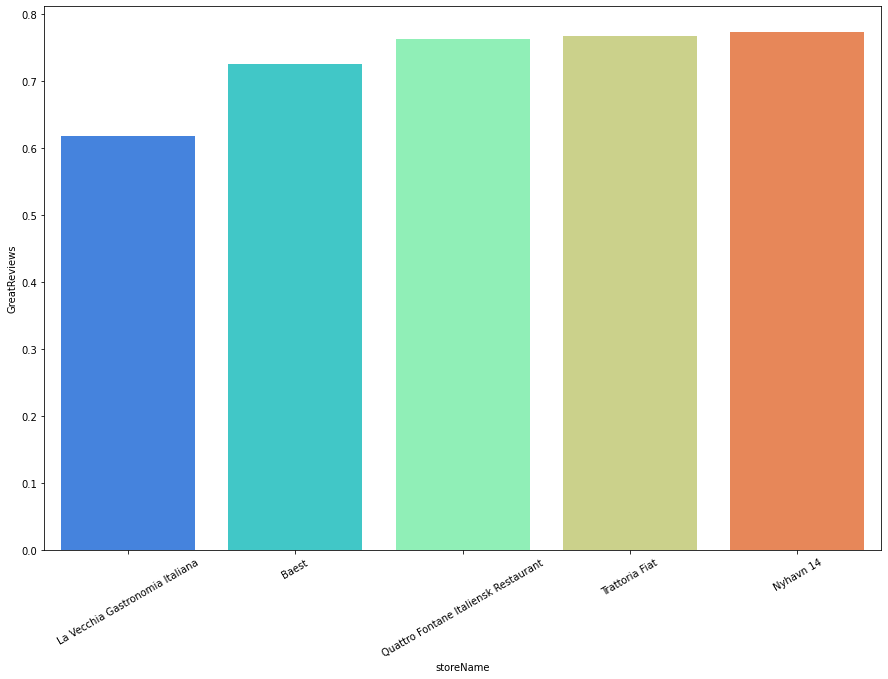

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(pizza_reviews.groupby('storeName')['GreatReviews'].mean().sort_values(ascending=True).head(5).index,
                 y=pizza_reviews.groupby('storeName')['GreatReviews'].mean().sort_values(ascending=True).head(5),palette="rainbow")
plt.xticks(rotation=30)
plt.show();

👆🏼 From the plot above, we can see that the restaurant <font color='green'>La Vecchia Gastronomia Italiana </font> is receiving the lowest sentiment score. However, it is over 0.6 and the reason for it is because we have by far the most positive reviews in our dataset. Furthermore, what we observe here is that this restaurant was also scoring on average the lowest polarity score.

---

Finally, before preparing the data for modeling, let's analyze the polarity score based on the restaurant name 👩🏽‍🍳

In [ ]:
fig = px.box(pizza_reviews[pizza_reviews.storeName.isin(name_list)], x='storeName', y='polarity', color='storeName',
             title="Polarity Based on Restaurant Name",
             hover_data=['polarity'])
fig.show()

💥 We can see that the spread of sentiment polarity is the highest for the restaurant <font color='green'>Neighbourhood</font>, where the polarity score is highest 1 and lowest -1. 

**Next thing up is to prepare our data for modeling:**

🛠 Although our model can accurately predict positive feedback, it will be difficult to predict negative ones (over 83% of our reviews are positive), so we used the *RandomUnderSampling* approach.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



We must transform the text into numerical feature vectors before using it in machine learning algorithms. For this, we can use **TF-IDF** and **CountVectorizer**. With CountVectorizer, we can count the number of times a word appears in the text. TF-IDF accomplishes this using a statistical approach. We are going to use the **TF-IDF** approach.

--- 

Let's begin by building a function for the TF-IDF. Here we use the *RandomUnderSampler*, which deletes examples in the majority class. To train the model, we will use a test size of 20% and because the data is imbalanced we set the stratify equal to y_under. We want the proportion of positive and negative reviews to be the same.

In [ ]:
def model_produce(X, y, model, min_df, ngram_range):
    m = model(stop_words=stop_words, min_df = min_df, max_df = .85, token_pattern = '\\b[a-z][a-z]+\\b', ngram_range=ngram_range)
    m2 = m.fit_transform(X)
    X_under, y_under = RandomUnderSampler(random_state = 42).fit_sample(m2, y)
    X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42, stratify = y_under)
  
    return X_train, X_test, y_train, y_test

Instead of manually implementing TF-IDF ourselves, we are going to use the class provided by sklearn, *TfidfVectorizer*. Our feature is the column **reviews_clean** and our target label is the column ***GreatReviews***.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

X = pizza_reviews['reviews_clean']
y = pizza_reviews['GreatReviews']

model = TfidfVectorizer
ngram_range =(1,2)
X_train, X_test, y_train, y_test = model_produce(X, y, model, 1, ngram_range)


Counter(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 475, 1: 475})

🙌🏼 Great - from the Counter results above we can see that we no longer have an imbalanced dataset!

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="LSA"></a>
### 5.1.1 LSA ✏️

LSA is an information retrieval technique that examines and describes patterns in unstructured collections of text, as well as their relationships. LSA is an unsupervised method of finding synonyms in a large number of documents.

We will use the transformer **TruncatedSVD**. This transformer uses truncated singular value decomposition to reduce linear dimensionality (SVD). This estimator, unlike PCA, does not center the data before computing the singular value decomposition. This means it can efficiently work with sparse matrices. Let's define a function to plot LSA and apply it to our training set. We will visualize it in 2-D.

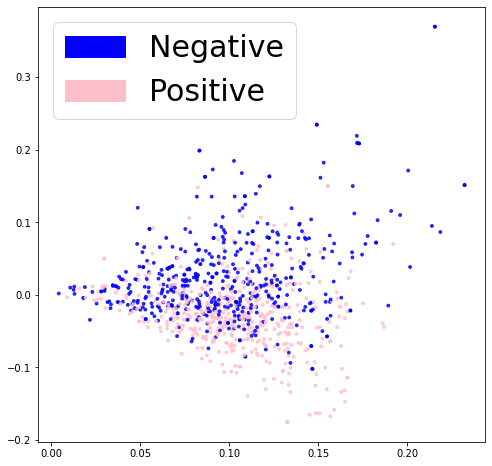

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath='PCA_demo.csv', plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['blue','pink','pink']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='blue', label='Negative')
            green_patch = mpatches.Patch(color='pink', label='Positive')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train, y_train)
plt.show()

👆🏼 These embeddings are pretty cleanly separated. Therefore, let's try applying it to TF-IDF Vectorizor

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



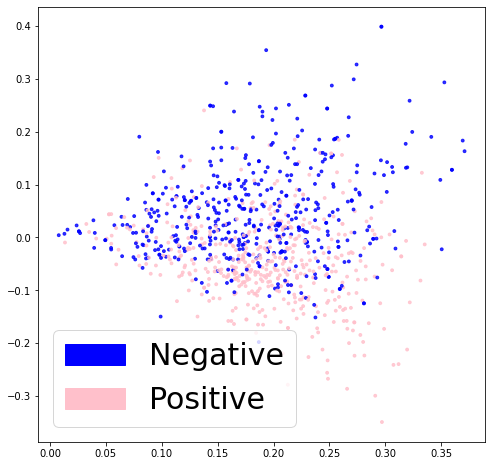

In [ ]:
model = TfidfVectorizer
ngram_range = (1,1)

X_train2, X_test2, y_train2, y_test2 = model_produce(X, y, model, 4, ngram_range)

fig = plt.figure(figsize = (8, 8))
plot_LSA(X_train2, y_train2)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



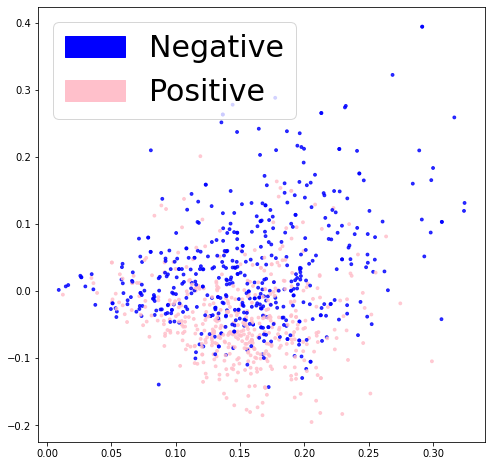

In [ ]:
model = TfidfVectorizer
ngram_range = (1,2)

X_train3, X_test3, y_train3, y_test3 = model_produce(X, y, model, 4, ngram_range)

fig = plt.figure(figsize = (8, 8))
plot_LSA(X_train3, y_train3)
plt.show()

From both of our LSA plots, we can see that the embeddings are more separated on our plot when using ngram_range = (1,1).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="Modelling"></a>
### 5.1.2 Modelling 💁🏼‍♀️

Now the fun starts! We begin by defining a function for standard performance metrics to be able to evaluate the quality of the output of a classifier. Moreover, we want to plot the confusion matrix 📊

In [ ]:
from sklearn.metrics import confusion_matrix

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predict Negative', 'Predict Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt = 'd', annot_kws = {'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg), 3)
    precision = round((true_pos) / (true_pos + false_pos), 3)
    recall = round((true_pos) / (true_pos + false_neg), 3)
    f1 = round(2 * (precision * recall) / (precision + recall), 3)

    cm_results = [accuracy, precision, recall, f1]
    print(cm_results)
    return cm_results

Here we begin by creating a list to gather the results from our classifiers. We are going to use:
*  GradientBoostingClassifier 
* RandomForestClassifier
* LogisticRegression
* XGBClassifier
* LinearSVC

Moreover, we use the **cross_val_score** to get CV predictions and **StratifiedKFold** to provide train/test indices to split data in train/test sets 🚂

In [ ]:
perform_list = []

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 20, random_state = 42, shuffle = True)
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(model)
    print('CV accuracy:', test_accuracy)
    print('Precision:{:6.4f},   Recall:{:6.4f}, F1:{:6.4f}'.format(precision, 
                                                                   recall, f1))
    cv_acc = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy').mean()
    cv_f1 = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'f1').mean()
    perform_list.append(dict([
            ('Model' , model.__class__.__name__),
            ('Train Accuracy', model.score(X_train,y_train)),
            ('Test Accuracy', test_accuracy),
            ('Precision' , precision ),
            ('recall', recall),
            ('f1', f1),
            ('CV Accuracy', cv_acc),
            ('CV f1', cv_f1)]))

🤖 Let's now import our classifiers and apply them to our training and test set:

In [ ]:
from sklearn.metrics import  precision_score, recall_score, precision_recall_curve,f1_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

perform_list = []
XGB = XGBClassifier()
GBC = GradientBoostingClassifier()
LR = LogisticRegression(solver='liblinear')
RF = RandomForestClassifier()
LSVC = LinearSVC()

models = [LR, GBC, RF, XGB, LSVC]


for model in models:
    calculate_metrics(model, X_train2, X_test2, y_train2, y_test2)
    print('------------------Model Result :---------------------')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
CV accuracy: 0.7941176470588235
Precision:0.7966,   Recall:0.7899, F1:0.7932
------------------Model Result :---------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                       

🙃 Our results from our classifiers are a bit messy, therefore let's change our performance list into a DataFrame and gain an insight into them like that.

In [ ]:
per = pd.DataFrame(perform_list)
per = per[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'recall', 'f1', 'CV Accuracy', 'CV f1']]
per

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1,CV Accuracy,CV f1
0,LogisticRegression,0.953684,0.794118,0.796610,0.789916,0.793249,0.821232,0.816514
1,GradientBoostingClassifier,0.935789,0.743697,0.768519,0.697479,0.731278,0.782159,0.767268
2,RandomForestClassifier,1.000000,0.768908,0.780702,0.747899,0.763948,0.797097,0.780091
3,XGBClassifier,0.883158,0.743697,0.754386,0.722689,0.738197,0.774889,0.762309
4,LinearSVC,0.997895,0.810924,0.830357,0.781513,0.805195,0.819016,0.818181


🤩 Here we can see that we are getting the best result with the **LinearSVC**. Therefore, let's train and test on that classifier and insert the results from it into our confusion matrix function.

[0.811, 0.83, 0.782, 0.805]


[0.811, 0.83, 0.782, 0.805]

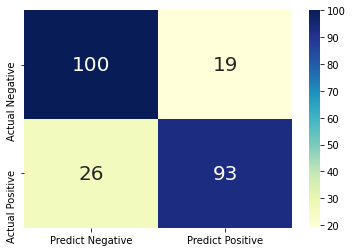

In [ ]:
LSVC2 = LinearSVC() 
LSVC2.fit(X_train2, y_train2)

y_pred1 = LSVC2.predict(X_test2)

conf_matrix(y_test2, y_pred1)

👆🏼 From the confusion matrix above, we can see that our classifier creates more false negatives than false positives. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<a id="FeatureImportance"></a>
### 5.1.3 Feature Importance 👌🏼

Feature importance scores are critical in predictive modelling projects because they provide insight into the data, insight into the model, and the foundation for dimensionality reduction and feature selection, all of which can increase the efficiency and effectiveness of a predictive model on the problem.

Here we are going to use **Feature Importance Score** to get a better insight into our data. 

Let's begin by implement **GridSearchCV** and fit it to our best model (LinearSVC) to find the best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [10e-10, 0.1, 1, 10, 10e10]}

lvc = LinearSVC()

lvc = GridSearchCV(LinearSVC(class_weight='balanced'), parameters, cv=5)

lvc.fit(X_train2, y_train2)
print(lvc.best_params_)

{'C': 0.1}


👆🏼 Above, we can see that the best parameter is 0.1. Moreover, we are going to use **"l2"** as a penalty when fitting our data to our model. We also want to use the standard performance metrics, confusion matrix.

[0.794, 0.797, 0.79, 0.793]


[0.794, 0.797, 0.79, 0.793]

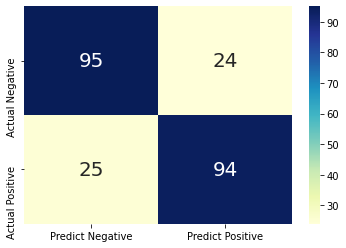

In [ ]:
lvc = LinearSVC(C = 0.1, penalty = 'l2')
lvc.fit(X_train2, y_train2)

y_pred1 = lvc.predict(X_test2)

conf_matrix(y_test2, y_pred1)

🥳 Now we can see that our model is predicting a more balanced outcome than before! 

--- 

Let's now import the **eli5** Python package which helps to debug classifiers and explain their predictions. 

In [ ]:
#! pip install eli5
import eli5

     |████████████████████████████████| 112kB 4.8MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



Firstly, we start by building a vectorizer to get the feature names. That is, to be able to get readable results when using the eli5 package.

In [ ]:
m = TfidfVectorizer()
m2 = m.fit_transform(X)


In [ ]:
modeldf = pd.DataFrame(m2.toarray(), columns = m.get_feature_names())


In [ ]:
m3  = pd.concat([pizza_reviews['polarity'], modeldf],axis=0)


Lastly, we use the *RandomUnderSample* again, and insert our classifier and vectorizer into the eli5.show_weights to receive readable output from the **Feature Importance**.

In [ ]:
X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(m2,y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42, stratify = y_under)

eli5.show_weights(lvc, vec=m)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Weight?,Feature
+0.995,august
+0.896,biggest
+0.869,aparthotel
+0.586,coldfermented
+0.580,considering
+0.574,brulee
+0.562,backand
+0.546,becomes
+0.538,1st
+0.528,beer


😲 What is interesting here is that the word <font color='orange'>cold-fermented</font> receives high importance for the positive reviews. By doing a simple Google search, we found out that cold fermentation demonstrates noticeable better flavor and better structure for the pizza dough. Moreover, <font color='orange'>beer</font> and <font color='orange'>calzones</font> are important for positives reviews.

The negative reviews are more regarding <font color='red'>distasteful</font> and <font color='red'>comfort</font> (most likely the place/seats were not comfortable). Furthermore, in the negative reviews we have two numbers, <font color='red'>500</font> and <font color='red'>450</font>, which we assume that the customers are complaining about the price 💸

 ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<a id="Conclusion"></a>
# 6. Conclusion 🍕

**Analyzing the Reviews by Ratings & Location**

As mentioned in the introduction, we are consultants for a company who wants to open a pizza restaurant in Copenhagen. First and foremost, the company wants the restaurant to receive great reviews. When analyzing our dataset for all the reviews, we found out that customers are giving restaurants that offer pizza higher ratings in recent years. Moreover, when exploring the *word frequency* for the overall ratings, we found out that <font color='orange'>pizza</font> was the most mentioned word, followed by <font color='orange'>good</font>, <font color='orange'>food</font>, and <font color='orange'>place</font>. 
It is important to know what words stand before or after the most frequent words. When we evaluated two words together for the overall ratings, <font color='green'> best pizza</font>, <font color='green'>really good</font> and <font color='green'>friendly staff</font> were used the most. This is not surprising because our dataset had over 83% great reviews.

To get more insight into the reviews, we decided to split them into three groups. The first group was great reviews, which were reviews with ratings of 4 and 5 stars. The most frequent words there were <font color='orange'>pizza</font>, <font color='orange'>good</font> and <font color='orange'>great</font>. Similar words as we observed for the overall ratings, which makes sense as our dataset contained most of great reviews. Furthermore, when analyzing the most two frequent words together for great reviews, we got almost the same words as for the overall ratings. However, which was interesting here, was that the reviewers were mentioning <font color='green'>reasonable price</font>  and <font color='green'>value money</font>.

The second group consisted of reviews of 2 and 3 stars. We were still getting the same frequent words but now in a different order. Therefore, it was interesting to see what words were standing with them most often. Now, we had a word combination like <font color='green'>good service</font>. However, word combinations like <font color='green'>nothing special</font> and <font color='green'>long time</font> begin to appear for these reviews. 

Finally, the last group contained reviews with ratings of 1. For these reviews, words connected to time appeared frequently. When analyzing the word combination for 1-star reviews, we got a completely different result. Service was now connected to <font color='green'>service terrible</font>. Moreover, it looked like customers were getting served slowly or not at all. One more word combination which was interesting for these reviews was <font color='green'>like popadom</font>. Popadom is an Indian dish, and reviewers were most likely comparing their pizza with this dish.

To conclude, <font color='orange'>pizza</font>, <font color='orange'>place</font>, and <font color='orange'>restaurant</font> were appearing most frequently in all our reviews. Afterthought, it would have been good practice to put these words also as our stopwords to gain better insight into the reviews. However, what we obtained from this analysis is that when running a pizza restaurant that receives great reviews, it is important to serve of course great pizza, have great service and friendly staff and sell the pizza at a reasonable price. Moreover, the data we had for analyzing the location was insufficient,so further analysis will be done in a seperated Notebook with more data.
 

*For frequency of 1 word*

\# | All Ratings | 4-5 Stars | 2-3 Stars | 1 Star  
--- | --- | --- | --- | --- 
**1** | Pizza | Pizza | Pizza | Pizza
**2** | Good | Good | Good | Food
**3** | Food | Great | Food | Service
**4** | Place | Place | Service | Table
**5** | Great | Food | Restaurant | One

*For Frequency of two words*

\# | All Ratings | 4-5 Stars | 2-3 Stars | 1 Star  
--- | --- | --- | --- | --- 
**1** | Best Pizza | Best Pizza | Good Pizza | Minute Late
**2** | Really Good | Relly Good | Food Good |  10 Minute
**3** | Friendy Staff | Friendly Staff | Italian Restaurant | Really Bad
**4** | Good Pizza | Great Pizza | Pizza Good | 20 Minute
**5** | Italian Food | Good Pizza | Really Good | Booked Table


**Sentiment Analysis**

In this section, we did a sentiment analysis on our reviews. We wanted to know what words were most important for great reviews and what the company should be aware of when running a pizza restaurant. We began with checking what restaurants were getting the fewest great reviews on average and analyzed their polarity score on average. The same restaurant, <font color='green'>La Vecchia Gastronomia</font>, had the lowest sentiment score (receiving the fewest great reviews on average) and the less polarity score. 

To be able to find the feature importance, we had to build a machine learning model and use the TF-IDF approach to convert the text to a numerical feature vector. We tried multiple models and got the best results by using the LinearSVC model. We got decent predictions by using the LinearSVC model and we were able to come up with the feature importance matrix.

The word <font color='orange'>august</font> received the highest importance in our positive reviews. It was difficult to find a good explanation why this word is important for pizza restaurants. However, we saw some interesting words such as <font color='orange'>cold-fermented</font>, <font color='orange'>beer </font> and <font color='orange'>calzones</font>. Therefore, when running a pizza restaurant that receives great reviews, it is important to have a great cold-fermented recipe for the pizza dough. Moreover, offer good beers and calzones. 🍻 

The most interesting feature important for the negative reviews were the numbers <font color='red'>450 </font> and <font color='red'>500 </font>, which are most likely connected to the price of the food/pizza. 💰 <br>
We also obtained this information when analyzing the reviews with ratings of 4 and 5 stars, that customers are price sensitive and want to buy the pizza at a reasonable price and get the value of what they are paying for. Therefore, the most likely explanation for these numbers is that the customers are paying too much for their pizza and thus the restaurant receives negative reviews. Moreover, the words <font color='red'>distasteful </font> and <font color='red'>comfort </font> were also connected to the negative reviews. The word <font color='red'>comfort </font> is most likely connected to that the restaurant or their seats were not comfortable 🪑

Conducting two different types of analysis gave us two different results of the "Best" pizza place in Copenhagen, as can be seen in the table below. 

Doing a *Text Analysis* lead us to <font color='orange'>Neighborhood</font> being the best restaurant, however, in the *Sentiment Analysis*, Neighbourhood, became the 13th best restaurant.
The same results can be seen if we look at the top restaurant from *Sentiment Analysis* we see that <font color='orange'>Tony's Pizzeria</font> ranks the highest, however it ranks 15th in *Text Analysis*. 

**Pizzeria MaMeMi & Wine Bar** ranks 2nd in *Text Analysis* and 3rd in *Sentiment Analysis*. So combining those two analyses, <font color='green'>Pizzeria MaMeMi & Wine Bar </font>is the top pizza restaurant in Copenhagen 🤩🤌🏼🍕

<br>


\# | Text Analysis | Sentiment Analysis |  
--- | --- | --- |  
**1** | <font color='orange'>Neighborhood</font> | <font color='orange'>Tony's Pizzeria</font> |  
**2** | <font color='green'>Pizzeria Mamemi & Wine Bar</font> | Madbaren Marmorkirken |  
**3** | Trattoria Fiat | <font color='green'>Pizzeria Mamemi & Wine Bar</font> |  
**4** | Baest | Madenitaly | 
**5** | La Vecchia Signora | Cafe Marzano |
**6** | Restaurant Tio Marios | Perbacco |
**7** | Madbaren Marmorkirken | Restaurant Tio Marios  |
**8** | Gorm's Magstræde | Trattoria Fiat |
**9** | Da Salvo | Made in Italy |
**10** | La Vecchia Gastronomia Italiana | Leifs Pizzeria |
**11** | Madenitaly | Da Salvo |
**12** | Perbacco | Nyhavn 14 |
**13** | Made in Italy | <font color='orange'>Neighborhood</font> |
**14** | Nyhavn 14 | Gorm's Magstræde |
**15** | <font color='Orange'>Tony's Pizzeria</font> | Baest |
**16** | Quattro Fontane Italiensk Restaurant | La Vecchia Signora |
**17** | Leifs Pizzeria | Quattro Fontane Italiensk Restaurant |
**18** | Cafe Marzano |  La Vecchia Gastronomia Italiana|


As a result, it is essential to both analyze the most frequent words appearing for different ratings of reviews and perform a sentiment analysis on the reviews. By this, we obtain a better insight into our dataset. 🤓  